In [9]:
!pip install -U ultralytics matplotlib seaborn pandas pyyaml

# Step 2: Import libraries
from ultralytics import YOLO
import os
import shutil
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="KBALF6O7uSsO4ZWszj5o")
project = rf.workspace("pani-edukal").project("ev-priority-classified-dataset-yxqyu")
version = project.version(2)
dataset = version.download("yolov12")
                

loading Roboflow workspace...
loading Roboflow project...


In [10]:
# Step 4: Verify dataset structure
# The dataset folder should contain data.yaml, train/, valid/, and test/ folders
data_yaml_path = os.path.join(dataset.location, "data.yaml")
print(f"Dataset downloaded to: {dataset.location}")
print(f"data.yaml path: {data_yaml_path}")

# Check data.yaml content (should list nc: 3, names: ['p1', 'p2', 'p3'])
with open(data_yaml_path, 'r') as f:
    print(f.read())

# Step 5: Load YOLOv12 medium model
model = YOLO("yolo11m.pt")  # Downloads pretrained weights to /kaggle/working/

Dataset downloaded to: /kaggle/working/EV-Priority-Classified-Dataset-2
data.yaml path: /kaggle/working/EV-Priority-Classified-Dataset-2/data.yaml
names:
- P1
- P2
- P3
nc: 3
roboflow:
  license: MIT
  project: ev-priority-classified-dataset-yxqyu
  url: https://universe.roboflow.com/pani-edukal/ev-priority-classified-dataset-yxqyu/dataset/2
  version: 2
  workspace: pani-edukal
test: test/images
train: train/images
val: test/images



In [11]:
# Step 3: Set dataset path and fix data.yaml (correct paths and add dummy 'val' pointing to test)
dataset_path = "/kaggle/working/EV-Priority-Classified-Dataset-2"
data_yaml_path = os.path.join(dataset_path, "data.yaml")
print(f"Using dataset from: {dataset_path}")
print(f"data.yaml path: {data_yaml_path}")

# Load and modify data.yaml
with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Correct relative paths and add 'val' as 'test/images' to satisfy YOLO requirements
data['train'] = 'train/images'
data['val'] = 'test/images'  # Dummy val to pass syntax check; won't be used with val=False
if 'test' in data:
    data['test'] = 'test/images'

# Save updated data.yaml
with open(data_yaml_path, 'w') as f:
    yaml.safe_dump(data, f)

# Read and display updated data.yaml contents
with open(data_yaml_path, 'r') as f:
    print("Updated data.yaml contents:")
    print(f.read())

# Verify directory structure (train and test only)
for split in ['train', 'test']:
    images_dir = os.path.join(dataset_path, split, 'images')
    labels_dir = os.path.join(dataset_path, split, 'labels')
    print(f"{split}/images exists: {os.path.exists(images_dir)}")
    print(f"{split}/labels exists: {os.path.exists(labels_dir)}")
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        print(f"Warning: {split} directory structure is incomplete. Check for images and labels subdirectories.")

Using dataset from: /kaggle/working/EV-Priority-Classified-Dataset-2
data.yaml path: /kaggle/working/EV-Priority-Classified-Dataset-2/data.yaml
Updated data.yaml contents:
names:
- P1
- P2
- P3
nc: 3
roboflow:
  license: MIT
  project: ev-priority-classified-dataset-yxqyu
  url: https://universe.roboflow.com/pani-edukal/ev-priority-classified-dataset-yxqyu/dataset/2
  version: 2
  workspace: pani-edukal
test: test/images
train: train/images
val: test/images

train/images exists: True
train/labels exists: True
test/images exists: True
test/labels exists: True


In [12]:
# Verify directory structure (train and test only, since no val)
for split in ['train', 'test']:
    images_dir = os.path.join(dataset_path, split, 'images')
    labels_dir = os.path.join(dataset_path, split, 'labels')
    print(f"{split}/images exists: {os.path.exists(images_dir)}")
    print(f"{split}/labels exists: {os.path.exists(labels_dir)}")
    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        print(f"Warning: {split} directory structure is incomplete. Check for images and labels subdirectories.")

train/images exists: True
train/labels exists: True
test/images exists: True
test/labels exists: True


Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/EV-Priority-Classified-Dataset-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov12m_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, pe

invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.849      0.779      0.857      0.769

100 epochs completed in 1.901 hours.
Optimizer stripped from /kaggle/working/runs/detect/yolov12m_custom/weights/last.pt, 40.5MB
Optimizer stripped from /kaggle/working/runs/detect/yolov12m_custom/weights/best.pt, 40.5MB

Validating /kaggle/working/runs/detect/yolov12m_custom/weights/best.pt...
Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.9it/s 3.6ss


invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.849      0.779      0.857      0.769
                    P1         70         95      0.869      0.838      0.901      0.828
                    P2         49         83      0.881      0.843        0.9      0.833
                    P3         77        193      0.798      0.654      0.771      0.646
Speed: 0.2ms preprocess, 12.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /kaggle/working/runs/detect/yolov12m_custom
Last model saved as best to /kaggle/working/yolov12m_custom_best.pt
Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1444.7±463.5 MB/s, size: 55.5 KB)
val: Scanning /kaggle/working/EV-Priority-Classified-Dataset-2/test/labels.cache... 201 images, 5 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 201/201 419848.2it/s 0.0s.0s

invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.849      0.778      0.857      0.769
                    P1         70         95      0.869      0.837      0.901      0.829
                    P2         49         83       0.88      0.843        0.9      0.832
                    P3         77        193      0.798      0.655      0.771      0.646
Speed: 1.5ms preprocess, 13.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /kaggle/working/runs/val/test_eval


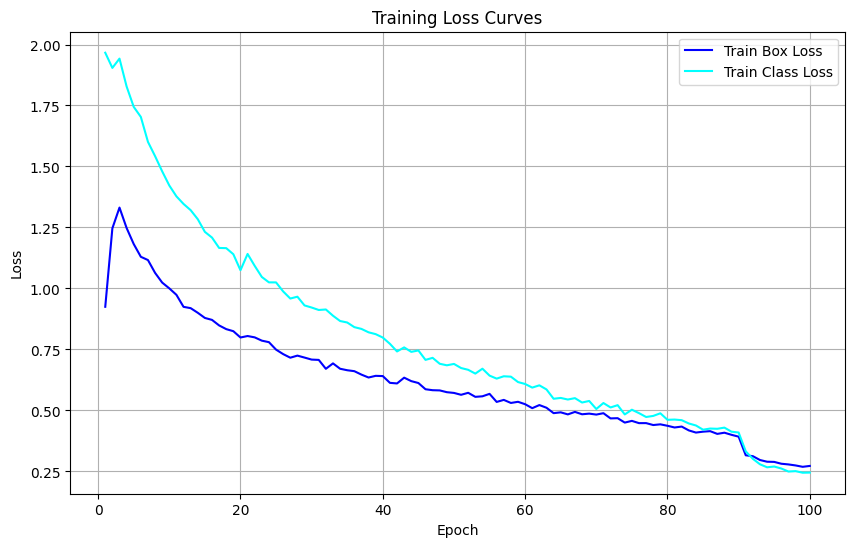

Displaying Confusion Matrix from Test Evaluation:


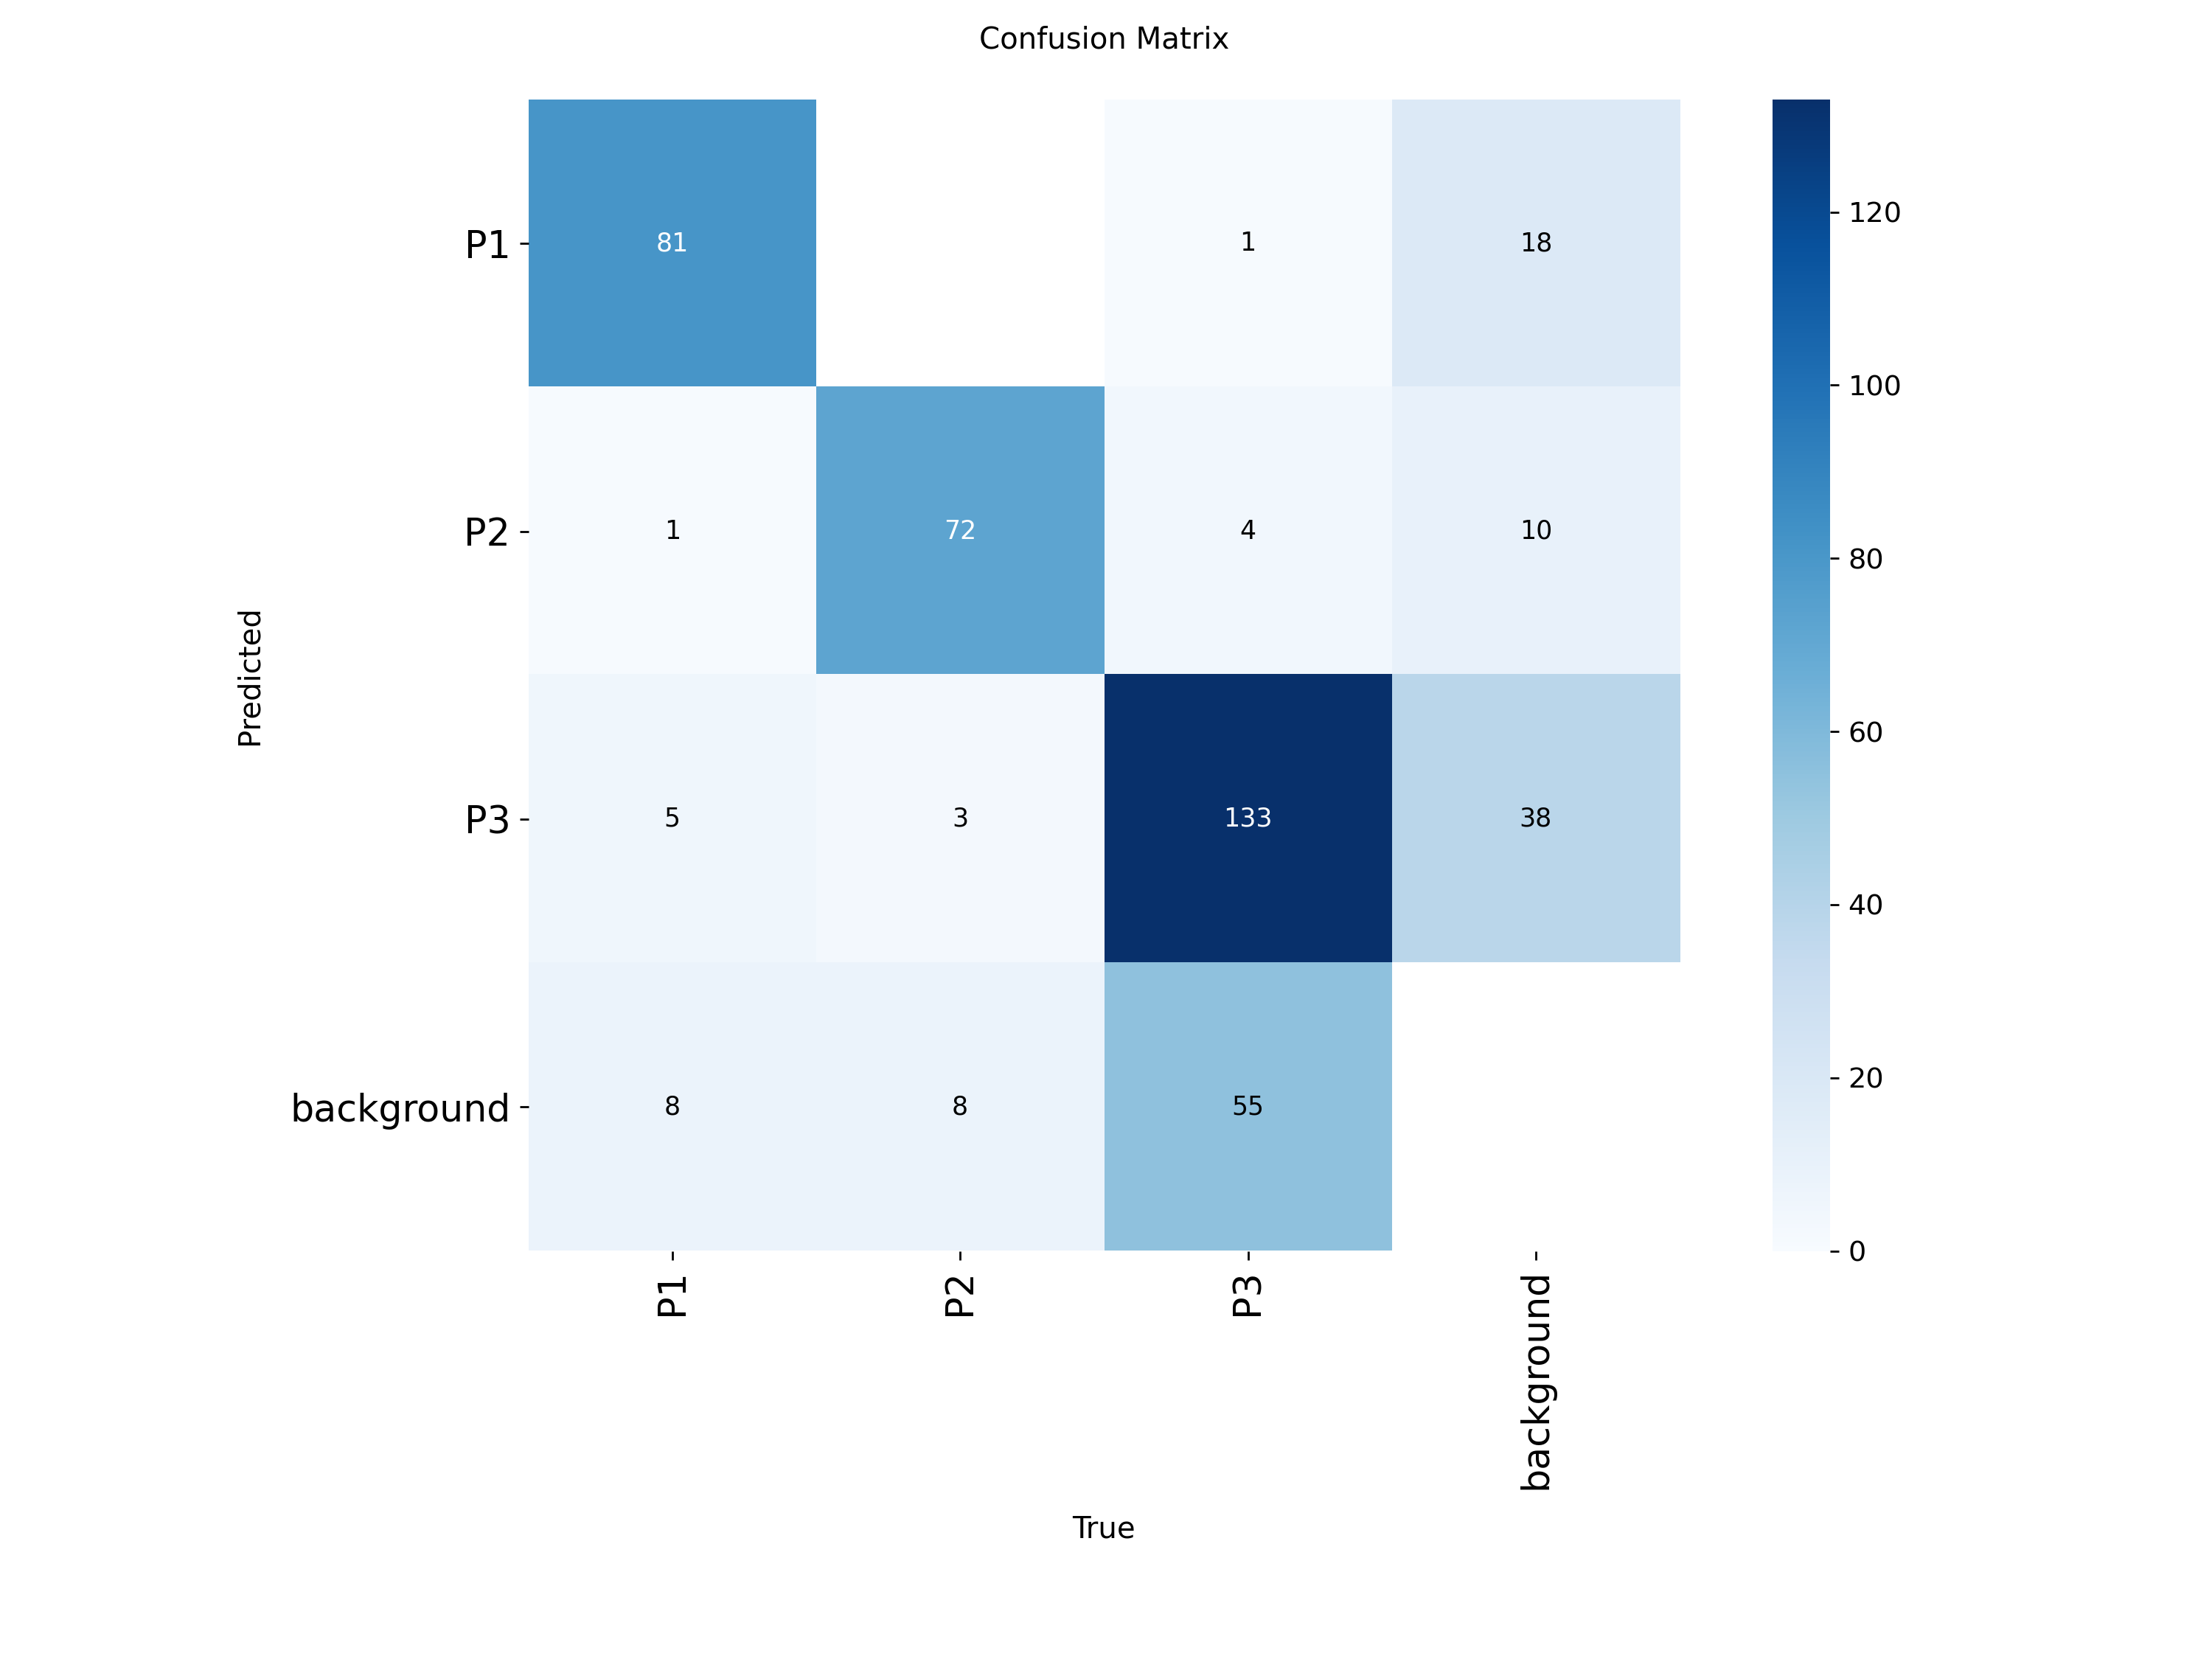

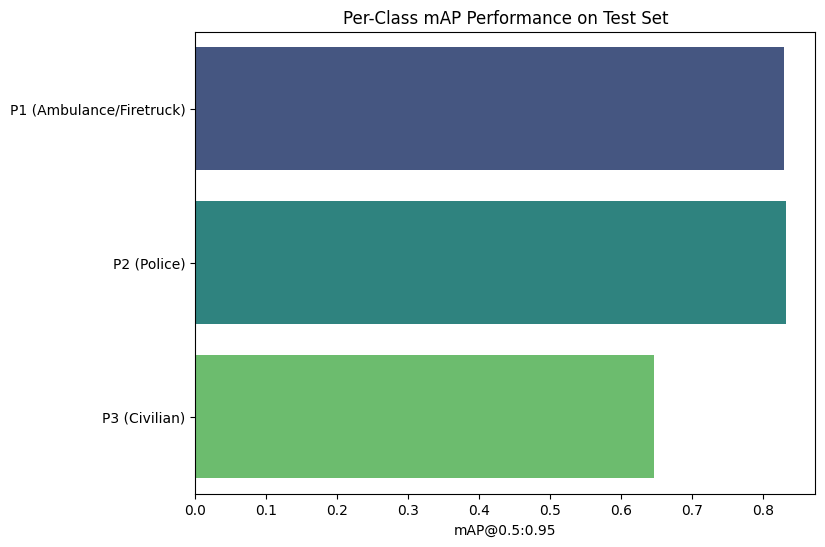

Ultralytics 8.3.187 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/kaggle/working/runs/detect/yolov12m_custom/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (38.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 14.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.65...
ONNX: export success ✅ 18.8s, saved as '/kaggle/working/runs/detect/yolov12m_custom/weights/best.onnx' (76.7 MB)

Export complete (20.4s)
Results saved to /kaggle/working/runs/detect/yolov12m_custom/weights
Predict:         yolo predict task=detect mod

In [13]:
# Step 5: Train the model without validation
results = model.train(      
    data=data_yaml_path,
    epochs=100,
    patience=15,
    imgsz=640,
    batch=16,
    name="yolov12m_custom",
    device=0,
    workers=4,
    amp=True,
    val=False,  # Disable validation during training
    save_period=5,  # Save checkpoint every epoch
    project="/kaggle/working/runs/detect",  # Output directory
    exist_ok=True  # Allow overwriting existing run
)

# Step 6: Save the last model as 'best' (since no validation for best mAP)
last_model_path = "/kaggle/working/runs/detect/yolov12m_custom/weights/last.pt"
best_model_path = "/kaggle/working/yolov12m_custom_best.pt"
if os.path.exists(last_model_path):
    shutil.copy(last_model_path, best_model_path)
    print(f"Last model saved as best to {best_model_path}")
else:
    print("Last model not found; check training logs.")

# Step 7: Evaluate on test set
val_results = model.val(
    data=data_yaml_path,
    split='test',
    project="/kaggle/working/runs/val",
    name="test_eval"
)

# Step 8: Load and plot training results (only train losses, since no val)
results_path = "/kaggle/working/runs/detect/yolov12m_custom/results.csv"
df = pd.read_csv(results_path)

# Plot 1: Training Loss Curves (only train, no val)
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss', color='cyan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/train_loss_curves.png')
plt.show()

# No mAP metrics plot, as no validation during training

# Plot 2: Display Confusion Matrix from test evaluation
confusion_matrix_path = "/kaggle/working/runs/val/test_eval/confusion_matrix.png"
if os.path.exists(confusion_matrix_path):
    print("Displaying Confusion Matrix from Test Evaluation:")
    display(Image(filename=confusion_matrix_path))
else:
    print("Confusion matrix not found.")

# Plot 3: Per-Class mAP Bar Chart from test evaluation
# Use mAP@0.5:0.95 per class from val_results
class_names = ['P1 (Ambulance/Firetruck)', 'P2 (Police)', 'P3 (Civilian)']
class_map = list(val_results.box.maps)  # mAP@0.5:0.95 per class

plt.figure(figsize=(8, 6))
sns.barplot(x=class_map, y=class_names, palette='viridis')
plt.xlabel('mAP@0.5:0.95')
plt.title('Per-Class mAP Performance on Test Set')
plt.savefig('/kaggle/working/per_class_map.png')
plt.show()

# Step 9: Export model to ONNX
model.export(format="onnx")
print("Model exported to /kaggle/working/yolov12m_custom.onnx")

# Step 10: Print download instructions
print("Training complete! Download outputs from /kaggle/working/:")
print("- yolov12m_custom_best.pt (best/last model weights)")
print("- yolov12m_custom.onnx (exported model)")
print("- train_loss_curves.png, per_class_map.png (plots)")
print("- /kaggle/working/runs/detect/yolov12m_custom/ (training logs)")
print("- /kaggle/working/runs/val/test_eval/ (test evaluation logs, confusion matrix)")